In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('usdrub.txt', sep=";")
df = df['<CLOSE>']

In [5]:
df = np.array(df).reshape(-1,1)
df

array([[59.2343],
       [59.1927],
       [59.2332],
       ...,
       [74.1308],
       [74.0699],
       [74.1201]])

In [6]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [7]:
X = []
y = []

for i in range(50 , len(df)):
    X.append(df[i-50:i, 0])
    y.append(df[i, 0])
split1 = 0.7
split2 = 0.9
border1 = int(df.shape[0]*split1)
border2 = int(df.shape[0]*split2)
X_train = X[: border1]
X_val = X[border1:border2]
X_test = X[border2:]
y_train = y[: border1]
y_val = y[border1:border2]
y_test = y[border2:]
X_train= np.asarray(X_train)
X_val= np.asarray(X_val)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

In [8]:
model=Sequential()
model.add(SimpleRNN(100,activation='relu',input_shape=(50,1)))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100)               10200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 10301 (40.24 KB)
Trainable params: 10301 (40.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#Compiling
model.compile(optimizer='adam', loss = 'mse')

In [12]:
model.fit(X_train,y_train, epochs = 5, batch_size=8)

Epoch 1/5
3798/3798 [==============================] - 139s 36ms/step - loss: 4.7853e-05
Epoch 2/5
3798/3798 [==============================] - 113s 30ms/step - loss: 4.7707e-05
Epoch 3/5
3798/3798 [==============================] - 117s 31ms/step - loss: 4.8083e-05
Epoch 4/5
3798/3798 [==============================] - 111s 29ms/step - loss: 4.6233e-05
Epoch 5/5
3798/3798 [==============================] - 113s 30ms/step - loss: 4.5450e-05


In [14]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
print(y_pred[:10])

135/135 [==============================] - 2s 12ms/step
[[74.744774]
 [74.93697 ]
 [75.295685]
 [75.264114]
 [75.31364 ]
 [75.25091 ]
 [75.05544 ]
 [75.20155 ]
 [75.04482 ]
 [74.837135]]


In [15]:
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)
print(y_test[:10])

[[74.9625 ]
 [75.36571]
 [75.2278 ]
 [75.2591 ]
 [75.17   ]
 [74.955  ]
 [75.1745 ]
 [74.969  ]
 [74.7473 ]
 [74.6475 ]]


In [18]:
mean_squared_error(y_test, y_pred)

0.017913568274989154

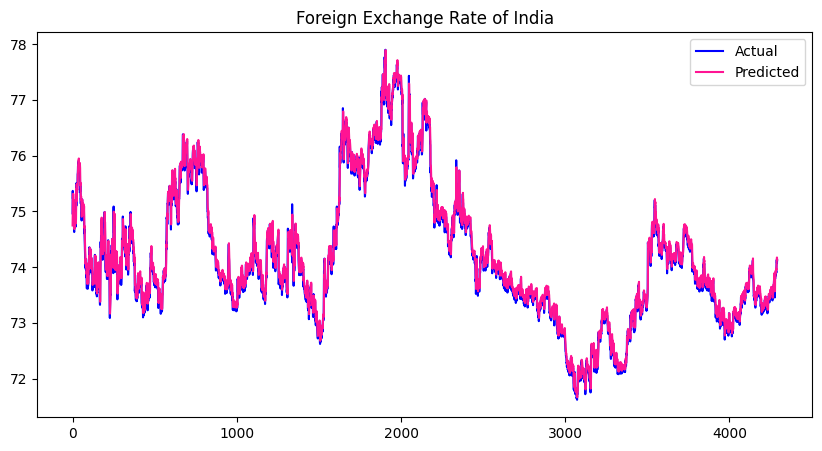

In [22]:
plt.figure(figsize=(10,5))
plt.title('Foreign Exchange Rate of India')
plt.plot(y_test , label = 'Actual', color = 'blue')
plt.plot(y_pred , label = 'Predicted', color = 'deeppink')
plt.legend()